# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo
df = pd.read_csv('sinasc_RO_2019.csv')

# Visualizando as primeiras linhas
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
# Definindo os intervalos e rótulos conforme o enunciado
intervalos = [0, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criando a nova coluna categorizada
df['APGAR5_cat'] = pd.cut(df['APGAR5'], 
                          bins=intervalos, 
                          labels=rotulos, 
                          include_lowest=True)

# Verificando a contagem de cada categoria
df['APGAR5_cat'].value_counts()

APGAR5_cat
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

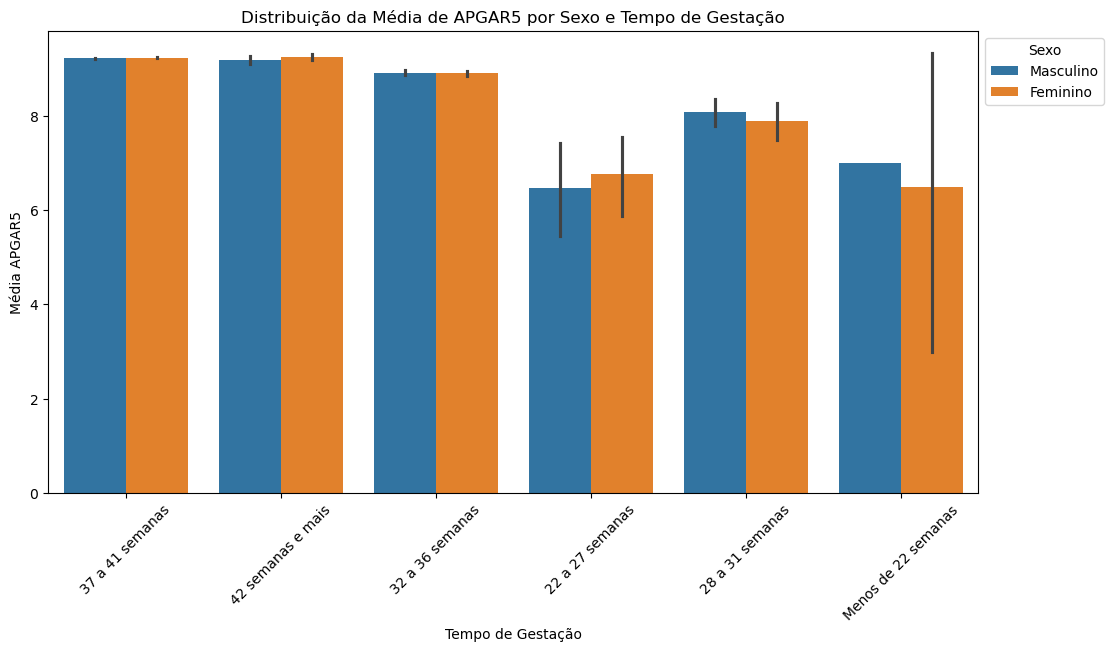

In [3]:
plt.figure(figsize=(12, 6))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)
plt.title('Distribuição da Média de APGAR5 por Sexo e Tempo de Gestação')
plt.xticks(rotation=45)
plt.xlabel('Tempo de Gestação')
plt.ylabel('Média APGAR5')
plt.legend(title='Sexo', bbox_to_anchor=(1, 1))
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [4]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])
tabela_cruzada

APGAR5_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [5]:
# Calculando os percentuais por linha (distribuição de APGAR5 para cada grupo de gestação)
tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
tabela_percentual

APGAR5_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003581,0.008505,0.032677,0.955237
37 a 41 semanas,0.001465,0.001243,0.008702,0.988589
42 semanas e mais,0.001433,0.001433,0.008596,0.988539
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

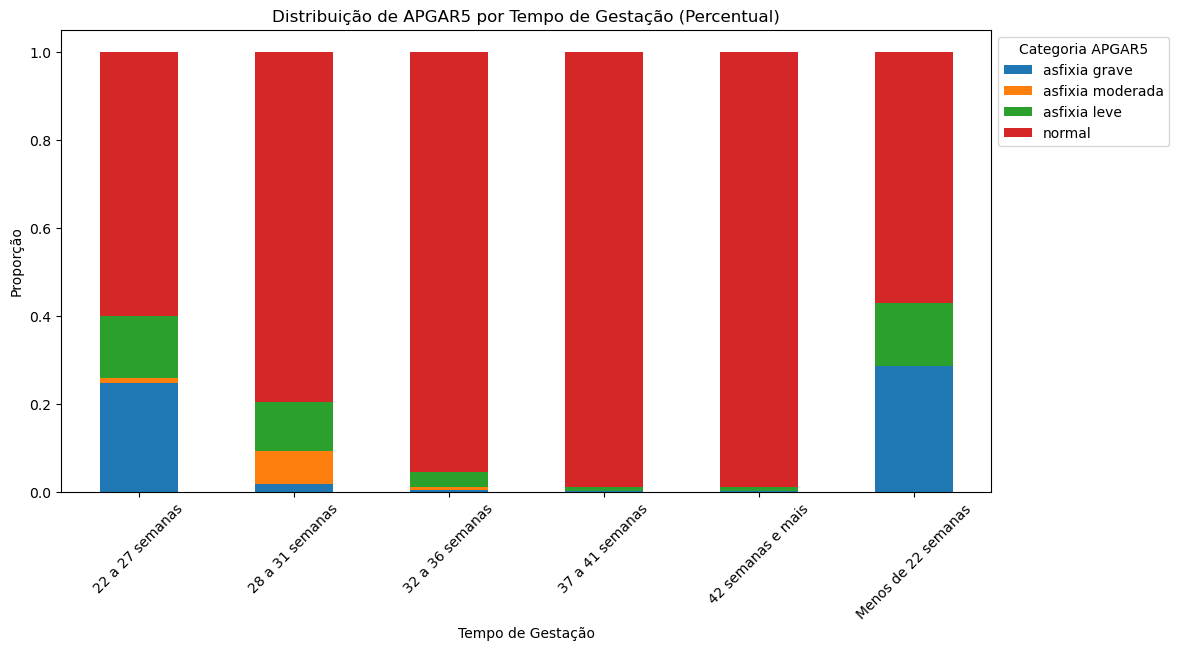

In [6]:
# Gerando o gráfico de barras empilhadas para facilitar a visualização das proporções
tabela_percentual.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação (Percentual)')
plt.ylabel('Proporção')
plt.xlabel('Tempo de Gestação')
plt.legend(title='Categoria APGAR5', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

# Conclusão:
# Sim, os dados corroboram com a afirmação dos médicos. 
# Observa-se que nos grupos de gestação com menos de 37 semanas (especialmente '22 a 27 semanas' e 'Menos de 22 semanas'), 
# a incidência de asfixia (grave, moderada ou leve) é significativamente maior do que no grupo 
# de 37 a 41 semanas, onde a categoria 'normal' é amplamente dominante.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

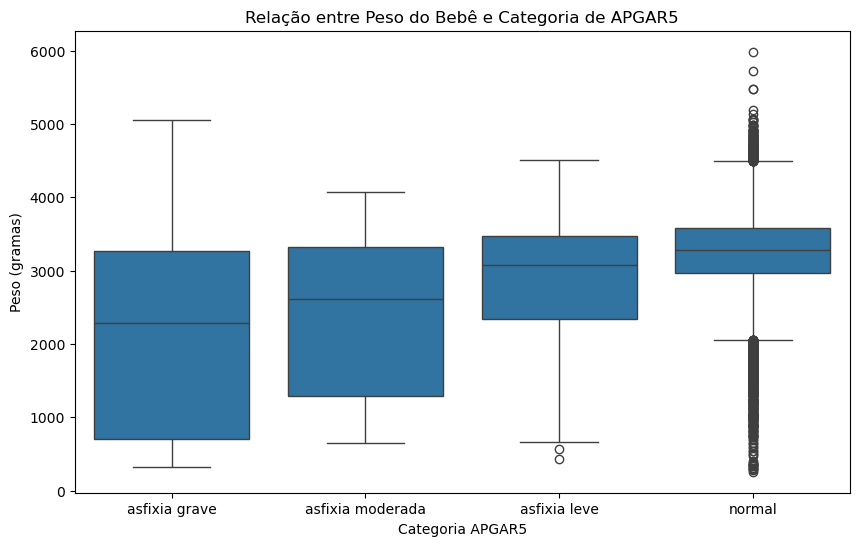

In [7]:
# Utilizando um boxplot para ver a distribuição de peso para cada categoria de APGAR5
plt.figure(figsize=(10, 6))
sns.boxplot(x='APGAR5_cat', y='PESO', data=df)
plt.title('Relação entre Peso do Bebê e Categoria de APGAR5')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso (gramas)')
plt.show()

# Insight adicional: O gráfico mostra que bebês com APGAR5 categorizado como 'normal' 
# tendem a ter um peso mediano maior e mais concentrado, enquanto bebês com asfixia 
# grave frequentemente apresentam pesos menores, sugerindo uma correlação entre 
# baixo peso ao nascer e dificuldades respiratórias iniciais.